In [41]:
# Obtenemos los datos de los tweets


data = open('../data/tweets.json', 'r').read()


In [49]:
# Procesamos los datos y los pythonizamos
import json
tweets = [json.loads(line) for line in data.splitlines()]

tweets = [tweet for tweet in tweets if not tweet['post_type'] == 'retweet']
print("{} tweets".format(len(tweets)))

144 tweets


In [50]:
# Analizamos los datos y los agregamos usando la librería pandas
import pandas as pd

frame = pd.DataFrame()
frame['text'] = map(lambda tweet : tweet['text'], tweets)
frame['candidate'] =  map(lambda tweet : tweet['candidate'], tweets)
frame['source'] =  map(lambda tweet : tweet['sources'][0], tweets)

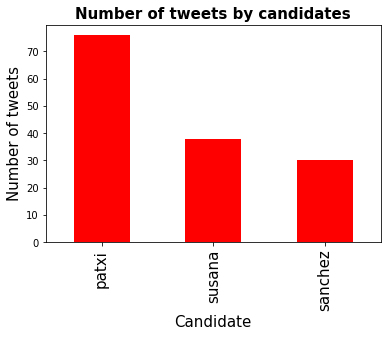

In [51]:
%matplotlib inline

# Gráficamos los datos
# En la siguiente gráfica se muestran los tweets agregados por cada candidato.
import matplotlib.pyplot as plt

tweets_by_candidates = frame['candidate'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Candidate', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Number of tweets by candidates', fontsize=15, fontweight='bold')
tweets_by_candidates.plot(ax=ax, kind='bar', color='red')


Populating the interactive namespace from numpy and matplotlib


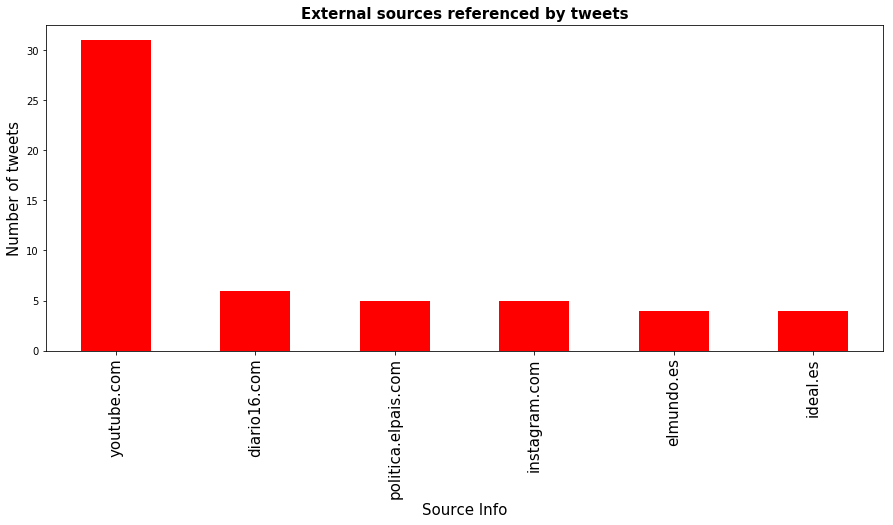

In [46]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

# Gráfica se muestran los tweets agreagados en función de la mención a la fuente de información externa.
tweets_by_source = frame['source'].value_counts()[0:6]

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Source Info', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('External sources referenced by tweets', fontsize=15, fontweight='bold')
tweets_by_source.plot(ax=ax, kind='bar', color='red')

Populating the interactive namespace from numpy and matplotlib


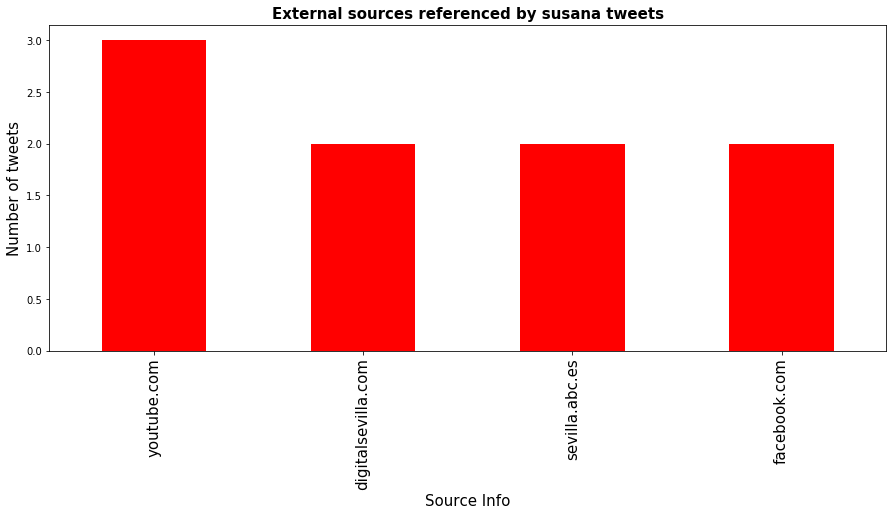

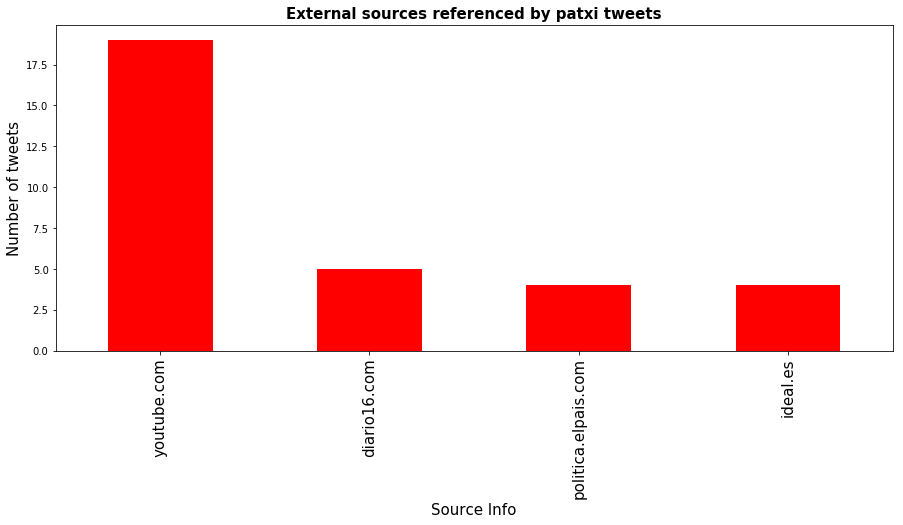

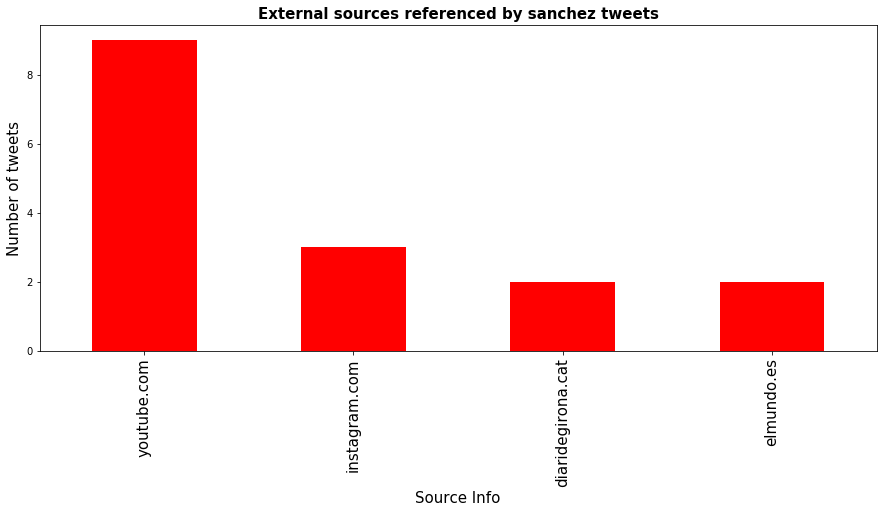

In [52]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

# Gráfica se muestran los tweets agreagados en función de la mención a la fuente de información externa y por cada candidato.
for candidate in set(map(lambda tweet:tweet['candidate'], tweets)):
    candidate_tweets = filter(lambda tweet:tweet['candidate'] == candidate, tweets)
    frame2 = pd.DataFrame()
    frame2['source'] = map(lambda tweet:tweet['sources'][0], candidate_tweets)
    
    tweets_by_source = frame2['source'].value_counts()[0:4]

    fig, ax = plt.subplots()
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlabel('Source Info', fontsize=15)
    ax.set_ylabel('Number of tweets' , fontsize=15)
    ax.set_title('External sources referenced by {} tweets'.format(candidate), fontsize=15, fontweight='bold')
    tweets_by_source.plot(ax=ax, kind='bar', color='red')
    